<a href="https://colab.research.google.com/github/MdShahadatHossainbd/ML/blob/master/2_Data_Cleaning_Data_Science_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)

In [2]:
df1 = pd.read_csv("bengaluru_house_prices.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df1.shape

(2228, 9)

In [4]:
df1.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [5]:
df1['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [6]:
df1['area_type'].value_counts()

Super built-up  Area    1454
Built-up  Area           426
Plot  Area               330
Carpet  Area              18
Name: area_type, dtype: int64

In [7]:
df2 = df1.drop(['area_type','society','balcony','availability'],axis='columns')
df2.shape

(2228, 5)

In [8]:
df2.isnull().sum()

location       1
size           2
total_sqft     0
bath          16
price          0
dtype: int64

In [9]:
df2.shape

(2228, 5)

In [10]:
df3 = df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [11]:
df3.shape

(2211, 5)

In [12]:
df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))
df3.bhk.unique()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10])

In [13]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [14]:
2+3

5

In [15]:
df3[~df3['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [16]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [17]:
df4 = df3.copy()
df4.total_sqft = df4.total_sqft.apply(convert_sqft_to_num)
df4 = df4[df4.total_sqft.notnull()]
df4.head(2)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4


In [18]:
df4.loc[30]

location      Yelahanka
size              4 BHK
total_sqft         2475
bath                  4
price               186
bhk                   4
Name: 30, dtype: object

In [19]:
(2100+2850)/2

2475.0

In [20]:
df5 = df4.copy()
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft']
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [21]:
df5_stats = df5['price_per_sqft'].describe()
df5_stats

count      2201.000000
mean       7224.581826
std       20194.405500
min         267.829813
25%        4284.323272
50%        5444.646098
75%        7191.011236
max      672727.272727
Name: price_per_sqft, dtype: float64

In [24]:
df5.to_csv("bhp.csv",index=False)

In [25]:
df5.location = df5.location.apply(lambda x: x.strip())
location_stats = df5['location'].value_counts(ascending=False)
location_stats

Whitefield                   86
Electronic City              56
Kanakpura Road               49
Sarjapur  Road               49
Yelahanka                    37
                             ..
Binnamangala                  1
Malimakanapura                1
Bank Avenue                   1
Mangammanapalya               1
Yemlur, Old Airport Road,     1
Name: location, Length: 614, dtype: int64

In [26]:
location_stats.values.sum()

2201

In [27]:
len(location_stats[location_stats>10])

37

In [28]:
len(location_stats)

614

In [29]:
len(location_stats[location_stats<=10])

577

In [30]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

Bisuvanahalli                10
Brookefield                  10
Jakkur                       10
Malleshwaram                 10
Vijayanagar                  10
                             ..
Binnamangala                  1
Malimakanapura                1
Bank Avenue                   1
Mangammanapalya               1
Yemlur, Old Airport Road,     1
Name: location, Length: 577, dtype: int64

In [31]:
len(df5.location.unique())

614

In [32]:
df5.location = df5.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df5.location.unique())

38

In [33]:
df5.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,other,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,other,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,other,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,other,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


In [34]:
df5[df5.total_sqft/df5.bhk<300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,other,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,other,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [35]:
df5.shape

(2201, 7)

In [36]:
df6 = df5[~(df5.total_sqft/df5.bhk<300)]
df6.shape

(2076, 7)

In [37]:
df6.price_per_sqft.describe()

count     2076.000000
mean      6126.511088
std       3244.279601
min        267.829813
25%       4212.955466
50%       5304.837394
75%       6852.961798
max      32352.941176
Name: price_per_sqft, dtype: float64

In [38]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df7 = remove_pps_outliers(df6)
df7.shape

(1698, 7)

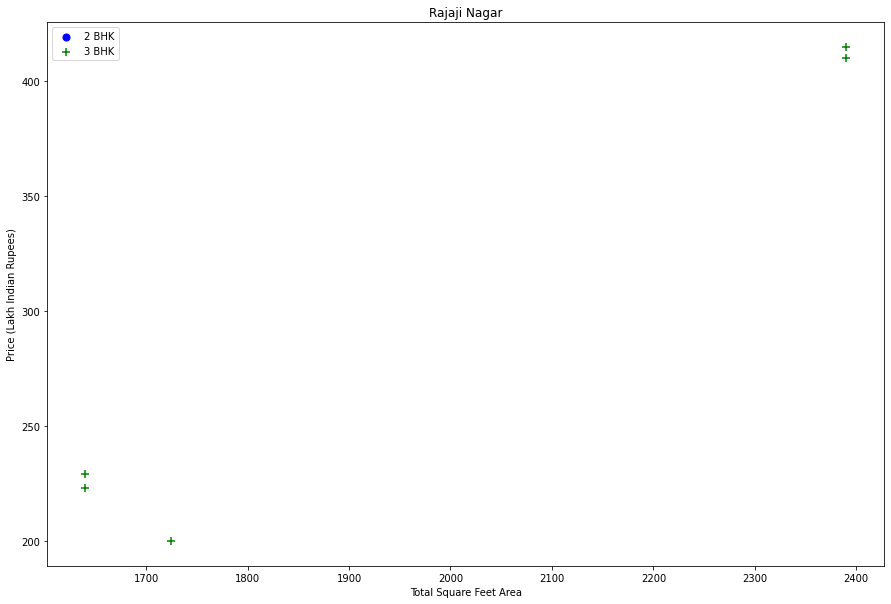

In [39]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df7,"Rajaji Nagar")

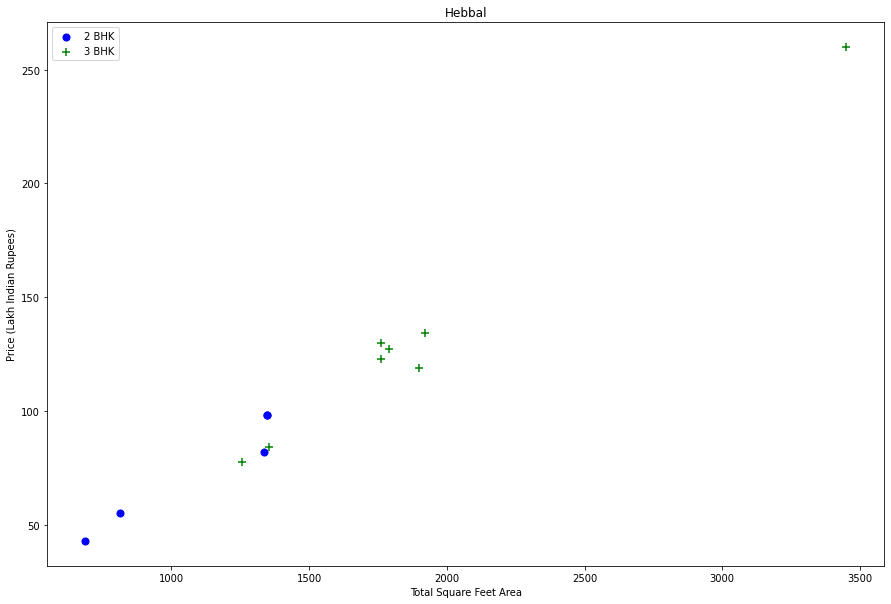

In [40]:
plot_scatter_chart(df7,"Hebbal")

In [41]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df8 = remove_bhk_outliers(df7)
# df8 = df7.copy()
df8.shape

(1091, 7)

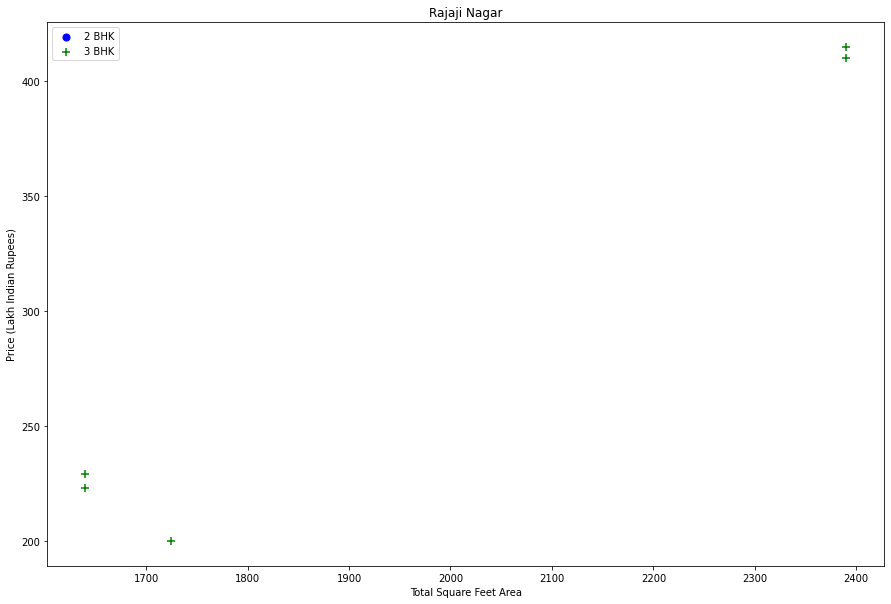

In [42]:
plot_scatter_chart(df8,"Rajaji Nagar")

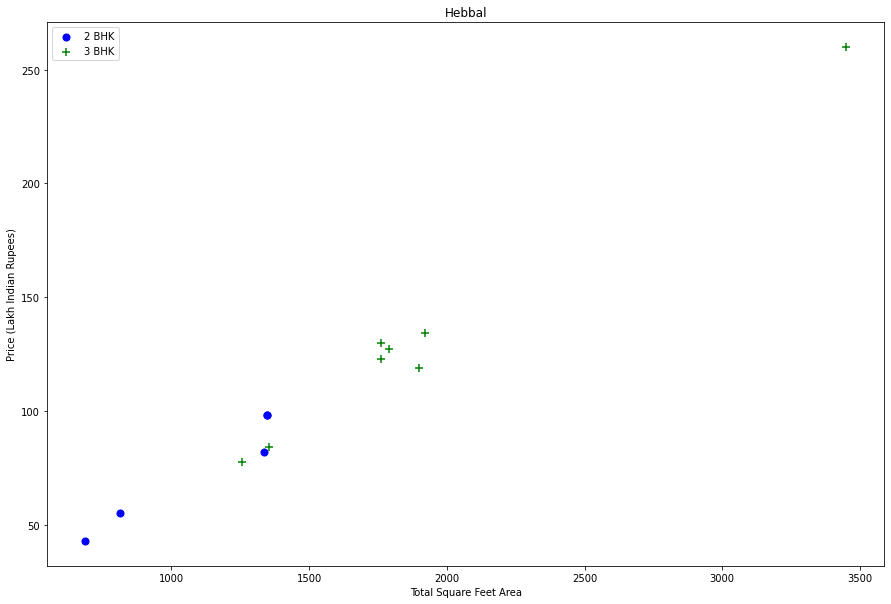

In [43]:
plot_scatter_chart(df8,"Hebbal")

Text(0, 0.5, 'Count')

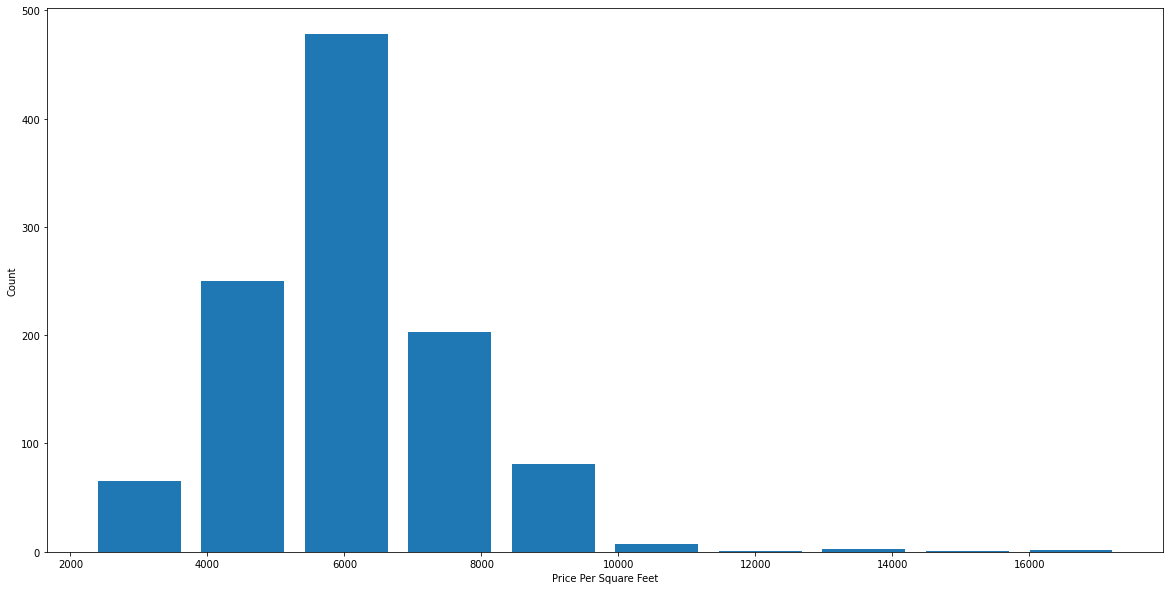

In [44]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [45]:
df8.bath.unique()

array([2., 3., 1., 5., 4., 8., 6., 7., 9.])

Text(0, 0.5, 'Count')

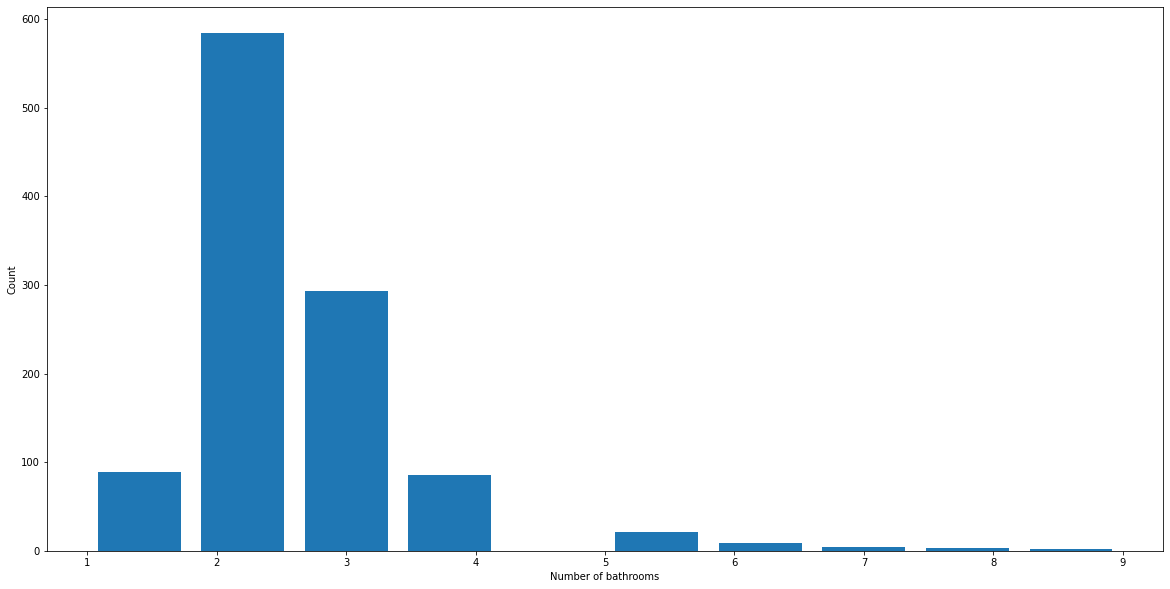

In [46]:
plt.hist(df8.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [48]:
df8[df8.bath>5]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
211,Hennur Road,8 Bedroom,5000.00,8.0,250.0,8,5000.000000
449,Sarjapur Road,4 BHK,3430.00,6.0,228.5,4,6661.807580
650,other,8 Bedroom,3000.00,8.0,140.0,8,4666.666667
661,other,6 Bedroom,3000.00,7.0,210.0,6,7000.000000
693,other,7 BHK,4000.00,7.0,225.0,7,5625.000000
739,other,8 Bedroom,2600.00,8.0,180.0,8,6923.076923
789,other,4 BHK,3122.00,6.0,230.0,4,7367.072389
846,other,11 BHK,5000.00,9.0,360.0,11,7200.000000
863,other,5 BHK,4500.00,7.0,337.0,5,7488.888889
882,other,4 BHK,5230.00,6.0,465.0,4,8891.013384


In [53]:
df8[df8.bath>df8.bhk+1]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
197,Hebbal,3 BHK,3450.00,5.0,260.0,3,7536.231884
449,Sarjapur Road,4 BHK,3430.00,6.0,228.5,4,6661.807580
660,other,3 BHK,1499.00,5.0,102.0,3,6804.536358
789,other,4 BHK,3122.00,6.0,230.0,4,7367.072389
863,other,5 BHK,4500.00,7.0,337.0,5,7488.888889
882,other,4 BHK,5230.00,6.0,465.0,4,8891.013384
1252,other,4 BHK,3467.86,6.0,249.0,4,7180.220655
1326,other,3 BHK,2465.00,5.0,234.0,3,9492.900609
1429,other,4 BHK,3715.00,6.0,224.5,4,6043.068641
1522,other,4 BHK,3012.00,6.0,250.0,4,8300.132802


In [54]:
df9 = df8[df8.bath<df8.bhk+2]
df9.shape

(1079, 7)

In [55]:
df9.head(2)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,7th Phase JP Nagar,2 BHK,1080.0,2.0,72.0,2,6666.666667
1,7th Phase JP Nagar,2 BHK,1270.0,2.0,93.0,2,7322.834646


In [56]:
df10 = df9.drop(['size','price_per_sqft'],axis='columns')
df10.head(3)

,location,total_sqft,bath,price,bhk
0,7th Phase JP Nagar,1080.0,2.0,72.0,2
1,7th Phase JP Nagar,1270.0,2.0,93.0,2
2,7th Phase JP Nagar,1420.0,2.0,100.0,3


In [57]:
dummies = pd.get_dummies(df10.location)
dummies.head(3)

,7th Phase JP Nagar,Akshaya Nagar,Bannerghatta Road,Begur Road,Bellandur,Chandapura,Electronic City,Electronic City Phase II,Electronics City Phase 1,HSR Layout,Haralur Road,Harlur,Hebbal,Hennur Road,Hoodi,Hosa Road,Hulimavu,JP Nagar,KR Puram,Kaggadasapura,Kanakpura Road,Kasavanhalli,Kengeri,Koramangala,Marathahalli,Panathur,Raja Rajeshwari Nagar,Rajaji Nagar,Ramamurthy Nagar,Sarjapur,Sarjapur Road,TC Palaya,Thanisandra,Uttarahalli,Whitefield,Yelahanka,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [58]:
df11 = pd.concat([df10,dummies.drop('other',axis='columns')],axis='columns')
df11.head()

,location,total_sqft,bath,price,bhk,7th Phase JP Nagar,Akshaya Nagar,Bannerghatta Road,Begur Road,Bellandur,Chandapura,Electronic City,Electronic City Phase II,Electronics City Phase 1,HSR Layout,Haralur Road,Harlur,Hebbal,Hennur Road,Hoodi,Hosa Road,Hulimavu,JP Nagar,KR Puram,Kaggadasapura,Kanakpura Road,Kasavanhalli,Kengeri,Koramangala,Marathahalli,Panathur,Raja Rajeshwari Nagar,Rajaji Nagar,Ramamurthy Nagar,Sarjapur,Sarjapur Road,TC Palaya,Thanisandra,Uttarahalli,Whitefield,Yelahanka,Yeshwanthpur
0,7th Phase JP Nagar,1080.0,2.0,72.0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,7th Phase JP Nagar,1270.0,2.0,93.0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,7th Phase JP Nagar,1420.0,2.0,100.0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,7th Phase JP Nagar,1850.0,3.0,150.0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,7th Phase JP Nagar,1245.0,2.0,94.0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [59]:
df12 = df11.drop('location',axis='columns')
df12.head(2)

,total_sqft,bath,price,bhk,7th Phase JP Nagar,Akshaya Nagar,Bannerghatta Road,Begur Road,Bellandur,Chandapura,Electronic City,Electronic City Phase II,Electronics City Phase 1,HSR Layout,Haralur Road,Harlur,Hebbal,Hennur Road,Hoodi,Hosa Road,Hulimavu,JP Nagar,KR Puram,Kaggadasapura,Kanakpura Road,Kasavanhalli,Kengeri,Koramangala,Marathahalli,Panathur,Raja Rajeshwari Nagar,Rajaji Nagar,Ramamurthy Nagar,Sarjapur,Sarjapur Road,TC Palaya,Thanisandra,Uttarahalli,Whitefield,Yelahanka,Yeshwanthpur
0,1080.0,2.0,72.0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1270.0,2.0,93.0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [60]:
df12.shape

(1079, 41)

In [61]:
X = df12.drop(['price'],axis='columns')
X.head(3)

,total_sqft,bath,bhk,7th Phase JP Nagar,Akshaya Nagar,Bannerghatta Road,Begur Road,Bellandur,Chandapura,Electronic City,Electronic City Phase II,Electronics City Phase 1,HSR Layout,Haralur Road,Harlur,Hebbal,Hennur Road,Hoodi,Hosa Road,Hulimavu,JP Nagar,KR Puram,Kaggadasapura,Kanakpura Road,Kasavanhalli,Kengeri,Koramangala,Marathahalli,Panathur,Raja Rajeshwari Nagar,Rajaji Nagar,Ramamurthy Nagar,Sarjapur,Sarjapur Road,TC Palaya,Thanisandra,Uttarahalli,Whitefield,Yelahanka,Yeshwanthpur
0,1080.0,2.0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1270.0,2.0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1420.0,2.0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [62]:
X.shape

(1079, 40)

In [63]:
y = df12.price
y.head(3)

0     72.0
1     93.0
2    100.0
Name: price, dtype: float64

In [64]:
len(y)

1079

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [67]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.9163731549352299

In [68]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.90051002, 0.86711454, 0.91180824, 0.82922001, 0.90933227])

In [69]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.883597,{'normalize': False}
1,lasso,0.802363,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.833199,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


In [84]:
X.columns

Index(['total_sqft', 'bath', 'bhk', '7th Phase JP Nagar', 'Akshaya Nagar',
       'Bannerghatta Road', 'Begur Road', 'Bellandur', 'Chandapura',
       'Electronic City', 'Electronic City Phase II',
       'Electronics City Phase 1', 'HSR Layout', 'Haralur Road', 'Harlur',
       'Hebbal', 'Hennur Road', 'Hoodi', 'Hosa Road', 'Hulimavu', 'JP Nagar',
       'KR Puram', 'Kaggadasapura', 'Kanakpura Road', 'Kasavanhalli',
       'Kengeri', 'Koramangala', 'Marathahalli', 'Panathur',
       'Raja Rajeshwari Nagar', 'Rajaji Nagar', 'Ramamurthy Nagar', 'Sarjapur',
       'Sarjapur  Road', 'TC Palaya', 'Thanisandra', 'Uttarahalli',
       'Whitefield', 'Yelahanka', 'Yeshwanthpur'],
      dtype='object')

In [ ]:
np.where(X.columns==locals)[0][0]

In [79]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [ ]:
predict_price('1st Phase JP Nagar',1000, 1, 0)

In [ ]:
predict_price('1st Phase JP Nagar',1000, 3, 3)

In [ ]:
predict_price('Indira Nagar',1000, 2, 2)

In [ ]:
predict_price('Indira Nagar',1000, 3, 3)

In [91]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [94]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))